## Factory Simulation

#### 1.  State the problem and its significance.

In this project I will simulate the process of a factory working on an unspecified object. The goal is to show how many variables work together and how costly it can be to run a business. The finding in this project can be expanded to managing any business where there are a lot of worker and time is needed to replace

#### 2.  Provide a flow-chart model.

![](factory_workflow.png)

The factory begins with 50 machines that work continously on a regular work cycle, 8 hours a day and 5 days a week for one year. When a machine has a certain part broken it will be replaced by a repairer with a spare, a machine part breaks on a normal distribution 80, 160. There are a fixed amount of repaires and spares. The entire process has costs build into them. The machines work for 15/hr and a spare costs 30 up front and 20/hr for the labor costs. When a part needs to be replaced some time is lost.

#### 3.  Simulate the process for the appropriate number of iterations (justify)

In [1]:
import simpy
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [2]:
def factory_run(env, repairers, spares):
    """
    The factory function is where all machines are deployed to do their task
    A global costs variable is declared to keep tract of the costs 
    """
    
    # Keep track of the costs
    global costs
    costs = 0

    # Deploying all machines
    for i in range(50):
        env.process(operate_machine(env, repairers, spares))

    # Updating costs
    while True:
        costs += 15 * 8 * repairers.capacity + 30 * spares.capacity

        # Cost updated every 8 hours
        yield env.timeout(8)


def operate_machine(env, repairers, spares):
    """
    Operate machine is where the operating machines are checked for 
    failure and if they do fail, they are repaired
    """
    
    global costs

    while True:
        
        # Time to failure
        yield env.timeout(generate_time_to_failure())
        t_broken = env.now
        print('Machine broke: {}'.format(t_broken))
        
        # Fix machine from spares
        env.process(repair_machine(env, repairers, spares))
        yield spares.get(1)
        
        t_replaced = env.now
        print('Machine replaced: {}'.format(t_replaced))
        
        # Update costs for labor
        costs += 20*(t_replaced - t_broken)


def repair_machine(env, repairers, spares):
    """
    Repairers repair the machine with spares
    """
    with repairers.request() as req:
        yield req
        yield env.timeout(generate_repair_time())
        yield spares.put(1)
    print('Repair complete: {}'.format(env.now))

In [3]:
def generate_time_to_failure():
    """
    Depending on how long a machine has been active, failure can happen 
    anywhere between 80hrs(one week) and 160hrs (one month)
    """
    return np.random.uniform(80, 160)

def generate_repair_time():
    """
    Depending on how damaged the machine is, a repairer can take anywhere between 2 and 6 hours
    """
    return np.random.uniform(2, 6)

In [4]:
def data_collection(env, spares):
    """
    Collect data on the time, cost and spares during the simulation
    """
    while True:
        stime.append(env.now)
        scost.append(costs)
        sspares.append(spares.level)
        yield env.timeout(1.0)

Now that the simulation is completed we can run it to find the balance between number of repairers and the cost.
As the simulation runs an empty dataframe will be populated to track important variables

In [5]:
df = pd.DataFrame()

for c in range(1, 10):
    stime = []
    scost = []
    sspares = []

    env = simpy.Environment()

    repairers = simpy.Resource(env, capacity=c) #staff
    spares = simpy.Container(env, init=20, capacity=20)

    env.process(factory_run(env, repairers, spares))
    env.process(data_collection(env, spares))

    # The simulation will run for 1 year at 8 hr/day 5days/week 52weeks/year
    env.run(until=8 * 5 * 52)
    
    tdf = pd.DataFrame({'time': stime, 'cost': scost, 'spares': sspares})
    tdf['repairers'] = c
    df = pd.concat([df, tdf])

Machine broke: 81.78714764627804
Machine replaced: 81.78714764627804
Machine broke: 83.9236235734916
Machine replaced: 83.9236235734916
Machine broke: 86.62860468887986
Machine replaced: 86.62860468887986
Repair complete: 87.05096918439767
Machine broke: 87.94680537002078
Machine replaced: 87.94680537002078
Machine broke: 89.78832905609207
Machine replaced: 89.78832905609207
Machine broke: 90.50607253645973
Machine replaced: 90.50607253645973
Machine broke: 90.95192616379082
Machine replaced: 90.95192616379082
Machine broke: 92.73979185428162
Machine replaced: 92.73979185428162
Repair complete: 92.81623056083609
Machine broke: 93.87156020003574
Machine replaced: 93.87156020003574
Machine broke: 95.5070307266339
Machine replaced: 95.5070307266339
Machine broke: 97.52866633457572
Machine replaced: 97.52866633457572
Repair complete: 98.00224904099848
Machine broke: 99.66431463981756
Machine replaced: 99.66431463981756
Machine broke: 100.06743122199836
Machine replaced: 100.06743122199836


Machine replaced: 370.3117183423577
Repair complete: 371.55952340160064
Machine broke: 372.0107219982991
Machine replaced: 372.0107219982991
Repair complete: 373.2315740852063
Repair complete: 373.73211547955754
Repair complete: 375.78158373640235
Repair complete: 377.9980762243989
Repair complete: 381.1033834217993
Repair complete: 383.58133037775787
Repair complete: 384.72797044861363
Machine broke: 385.2460269087824
Machine replaced: 385.2460269087824
Machine broke: 385.8904772864865
Machine replaced: 385.8904772864865
Machine broke: 385.97992553739397
Machine replaced: 385.97992553739397
Machine broke: 386.36690427533523
Machine replaced: 386.36690427533523
Repair complete: 386.94169823674616
Repair complete: 388.2162137209964
Machine broke: 389.21368091551926
Machine replaced: 389.21368091551926
Machine broke: 389.4036272587913
Machine replaced: 389.4036272587913
Repair complete: 390.4268812785301
Repair complete: 392.66364706122886
Repair complete: 395.415537871326
Repair complet

Machine broke: 80.74208996251686
Machine replaced: 80.74208996251686
Machine broke: 81.80329495341371
Machine replaced: 81.80329495341371
Machine broke: 83.49465602381142
Machine replaced: 83.49465602381142
Repair complete: 84.73999272712827
Repair complete: 85.36744662643717
Machine broke: 85.42772327872568
Machine replaced: 85.42772327872568
Repair complete: 86.81429826080385
Repair complete: 88.73389150592625
Machine broke: 89.36597939894467
Machine replaced: 89.36597939894467
Machine broke: 92.87405943139066
Machine replaced: 92.87405943139066
Machine broke: 93.37930204258679
Machine replaced: 93.37930204258679
Repair complete: 93.88994498285061
Machine broke: 96.26861298033747
Machine replaced: 96.26861298033747
Machine broke: 96.29221819837052
Machine replaced: 96.29221819837052
Repair complete: 96.58349816029359
Repair complete: 97.51429077505767
Machine broke: 97.5544026639928
Machine replaced: 97.5544026639928
Machine broke: 97.9755086435926
Machine replaced: 97.9755086435926


Repair complete: 1942.340545999451
Machine broke: 1944.0979703732776
Machine replaced: 1944.0979703732776
Repair complete: 1944.7371891341727
Machine broke: 1945.6622195052546
Machine replaced: 1945.6622195052546
Machine broke: 1945.9393091271625
Machine replaced: 1945.9393091271625
Repair complete: 1946.566308667298
Repair complete: 1946.5754983105107
Machine broke: 1947.0692094791461
Machine replaced: 1947.0692094791461
Machine broke: 1947.2162476175308
Machine replaced: 1947.2162476175308
Machine broke: 1947.379639768419
Machine replaced: 1947.379639768419
Machine broke: 1947.8812181924309
Machine replaced: 1947.8812181924309
Repair complete: 1950.1543872557343
Repair complete: 1950.5284599369857
Repair complete: 1950.846456049392
Machine broke: 1951.505049161441
Machine replaced: 1951.505049161441
Repair complete: 1953.407095904825
Repair complete: 1953.9495678444591
Repair complete: 1954.377416315317
Repair complete: 1955.5354326424263
Machine broke: 1956.963592241281
Machine repl

Machine replaced: 1502.8341327781375
Repair complete: 1503.03004806801
Repair complete: 1506.8163937135453
Repair complete: 1507.1705803115674
Machine broke: 1511.1447638852749
Machine replaced: 1511.1447638852749
Machine broke: 1513.2057581940476
Machine replaced: 1513.2057581940476
Machine broke: 1513.6446210787158
Machine replaced: 1513.6446210787158
Repair complete: 1515.2377493077597
Machine broke: 1516.2072566032316
Machine replaced: 1516.2072566032316
Machine broke: 1516.2930972581246
Machine replaced: 1516.2930972581246
Repair complete: 1517.0915104745043
Repair complete: 1517.8528371943928
Machine broke: 1518.1574607970783
Machine replaced: 1518.1574607970783
Repair complete: 1518.4092812080276
Repair complete: 1518.7317870716145
Machine broke: 1520.7117604797145
Machine replaced: 1520.7117604797145
Machine broke: 1522.2936853004726
Machine replaced: 1522.2936853004726
Repair complete: 1523.0325862954714
Repair complete: 1523.658043808489
Machine broke: 1524.1479894027661
Mach

Repair complete: 1296.6570352283059
Repair complete: 1297.769437705169
Machine broke: 1297.9081862005244
Machine replaced: 1297.9081862005244
Machine broke: 1299.4702190067878
Machine replaced: 1299.4702190067878
Repair complete: 1303.0256426237029
Repair complete: 1304.238090441005
Machine broke: 1305.5291367132188
Machine replaced: 1305.5291367132188
Machine broke: 1305.6669335771942
Machine replaced: 1305.6669335771942
Machine broke: 1307.456504941257
Machine replaced: 1307.456504941257
Repair complete: 1309.376664000172
Machine broke: 1309.8376597513964
Machine replaced: 1309.8376597513964
Repair complete: 1310.111351550309
Machine broke: 1310.159976686804
Machine replaced: 1310.159976686804
Machine broke: 1310.4629639341204
Machine replaced: 1310.4629639341204
Repair complete: 1311.614799170829
Repair complete: 1313.286441104057
Machine broke: 1313.4323270240216
Machine replaced: 1313.4323270240216
Machine broke: 1314.912597902156
Machine replaced: 1314.912597902156
Repair complet

Repair complete: 811.838785858798
Repair complete: 814.0521200760116
Machine broke: 815.0297469058339
Machine replaced: 815.0297469058339
Repair complete: 815.0312790344184
Machine broke: 818.0889707930203
Machine replaced: 818.0889707930203
Machine broke: 818.4947327500655
Machine replaced: 818.4947327500655
Machine broke: 818.6001208812252
Machine replaced: 818.6001208812252
Repair complete: 820.03567588228
Machine broke: 820.5350995821143
Machine replaced: 820.5350995821143
Machine broke: 820.6844726803974
Machine replaced: 820.6844726803974
Repair complete: 820.8809881817249
Repair complete: 821.066109968738
Repair complete: 821.7587413295265
Repair complete: 823.477295241893
Repair complete: 824.3419121468846
Machine broke: 825.4361612133254
Machine replaced: 825.4361612133254
Machine broke: 827.6880734162094
Machine replaced: 827.6880734162094
Machine broke: 827.692556053746
Machine replaced: 827.692556053746
Machine broke: 827.9137737991946
Machine replaced: 827.9137737991946
Re

Machine broke: 676.6114954516639
Machine replaced: 676.6114954516639
Repair complete: 677.8929363180767
Machine broke: 678.5435539744167
Machine replaced: 678.5435539744167
Repair complete: 679.1452310466979
Repair complete: 680.530022358581
Repair complete: 680.5700152713773
Repair complete: 681.3668314165485
Machine broke: 681.9523059611272
Machine replaced: 681.9523059611272
Machine broke: 686.2013121081199
Machine replaced: 686.2013121081199
Machine broke: 686.508466890118
Machine replaced: 686.508466890118
Repair complete: 686.9073777287733
Machine broke: 688.7054024786457
Machine replaced: 688.7054024786457
Repair complete: 689.2014429724339
Repair complete: 690.7762803761028
Machine broke: 690.9551558445343
Machine replaced: 690.9551558445343
Machine broke: 692.104514131531
Machine replaced: 692.104514131531
Repair complete: 693.8871773226856
Repair complete: 694.1780135091823
Machine broke: 695.5205754079527
Machine replaced: 695.5205754079527
Repair complete: 695.86106486774
M

Machine replaced: 668.6159793916544
Repair complete: 670.7551431580318
Repair complete: 670.9546227697807
Repair complete: 671.4318426855968
Machine broke: 673.2585083694808
Machine replaced: 673.2585083694808
Repair complete: 675.7540383716346
Machine broke: 678.8947693211372
Machine replaced: 678.8947693211372
Machine broke: 680.3389362507388
Machine replaced: 680.3389362507388
Machine broke: 681.1368448787838
Machine replaced: 681.1368448787838
Machine broke: 682.0719402263962
Machine replaced: 682.0719402263962
Repair complete: 683.3020527084423
Repair complete: 684.1106085587331
Machine broke: 684.4740134028882
Machine replaced: 684.4740134028882
Machine broke: 684.9181994319537
Machine replaced: 684.9181994319537
Repair complete: 685.1952572661711
Repair complete: 686.4311327749485
Machine broke: 688.0840722184118
Machine replaced: 688.0840722184118
Repair complete: 688.1799645563187
Repair complete: 688.7392915648743
Machine broke: 689.4323795150606
Machine replaced: 689.4323795

Machine broke: 641.0158401616784
Machine replaced: 641.0158401616784
Machine broke: 641.0545472377328
Machine replaced: 641.0545472377328
Repair complete: 642.8278049331805
Repair complete: 643.4276169053014
Repair complete: 643.7840712792391
Repair complete: 644.792617308829
Repair complete: 645.6451659880507
Machine broke: 650.276709443938
Machine replaced: 650.276709443938
Machine broke: 651.7227294440984
Machine replaced: 651.7227294440984
Repair complete: 655.0898328189966
Repair complete: 657.4285721121578
Machine broke: 658.3183913791149
Machine replaced: 658.3183913791149
Machine broke: 659.0496479333441
Machine replaced: 659.0496479333441
Repair complete: 661.4923557718558
Machine broke: 661.9961214875779
Machine replaced: 661.9961214875779
Repair complete: 663.7679413850387
Repair complete: 665.4977249052403
Machine broke: 666.52835267672
Machine replaced: 666.52835267672
Machine broke: 667.7311603761101
Machine replaced: 667.7311603761101
Machine broke: 668.1315901304711
Mac

As we would expect one repairer would be very expensive since that individual will be working long hours, similarly many repairers will be costly because of the law of diminishing returns. The plot shows us the idea spot at 2 repairers. The difference between 1 and 2 repairer drops the cost by almost a factor of 8.

<AxesSubplot:xlabel='repairers'>

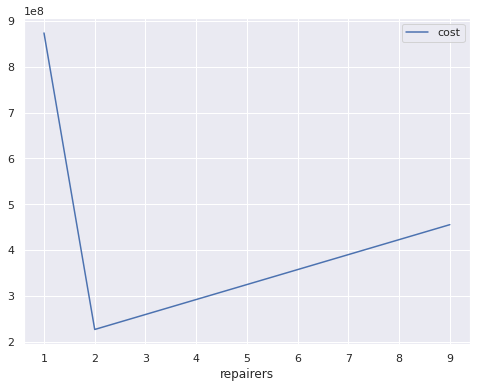

In [6]:
df.groupby('repairers', as_index=False).agg({'cost': 'sum'}).plot(x='repairers', y='cost', kind='line', figsize=(8,6))

With 2 repairers we can see how the spares were used.

<AxesSubplot:xlabel='time'>

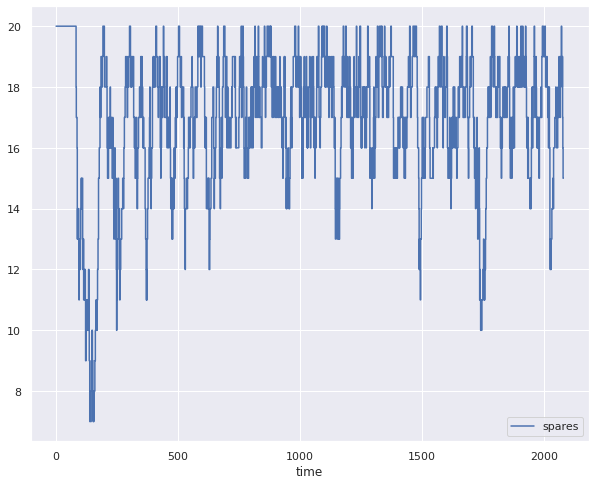

In [7]:
df[df['repairers'].eq(2)].plot(x='time', y='spares', drawstyle='steps', figsize=(10,8))

The plot above makes sense since we have 50 machines that start at the same time, a percent of them will fail around the same time causing the drop in the number of spares at the start. As the simulation continues the repairers catch upto the demand with less spares become needed.

#### 4.  Justify the validity of the model and discuss how you verified it.

The model was verified first by hand with a small number of workers then expanded to include a larger number.

### Conclusion

This simple simulation brings up a lot of important factors that need to be accounted for when one starts a business. Things break, people burn out and everything is expensive at the start. This simulation can be expanded to account for difference in hour wage or if we had a smaller spare pool to work with. Furthermore the hours worked and the number of machines in the process can also be modified for futher insight to the process. 